In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer 
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수 
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model

# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

오프라인 비중 그룹별 Segment_code 평균:
오프라인_그룹
상위50%    3.644526
하위50%    3.808982
Name: Segment_code, dtype: float64

입금액 상위 20% 그룹 Segment_code 분포:
Segment_code
4    0.427435
3    0.383174
2    0.187199
0    0.001972
1    0.000219
Name: proportion, dtype: float64


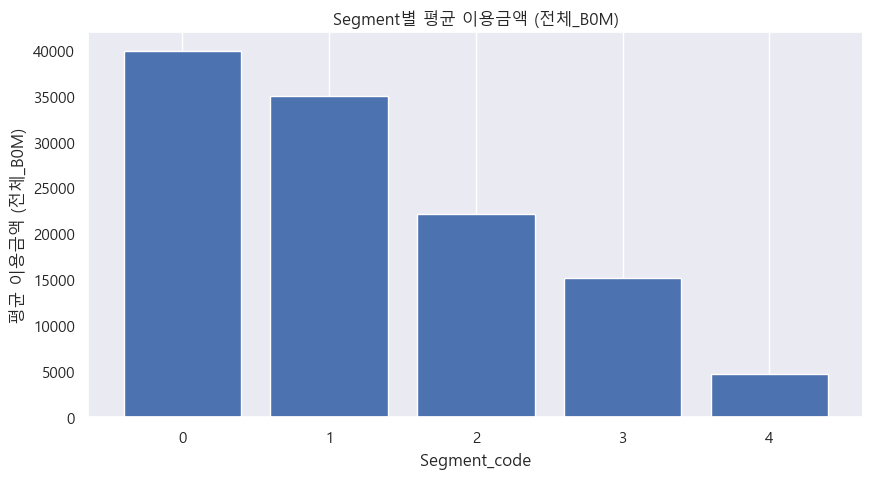

In [11]:
# 분석할 주요 컬럼 리스트
columns_to_use = [
    '이용금액_일시불_B0M',
    '이용금액_일시불_R12M',
    '이용금액_일시불_R6M',
    '이용금액_일시불_R3M',
    '이용금액_오프라인_R6M',
    '이용금액_오프라인_R3M',
    '이용금액_오프라인_B0M',
    '정상청구원금_B0M',
    '정상입금원금_B0M',
    '정상입금원금_B2M',
    '정상입금원금_B5M'
]

# 추가로 전체 이용금액 계산에 쓸 컬럼(예: 온라인 이용금액 컬럼) 필요하면 여기에 추가하세요
# 예시) '이용금액_온라인_B0M'

# 1) 회원정보 불러오기 (ID, Segment)
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])

# 2) 승인매출정보에서 필요한 컬럼만 불러오기 (ID 포함)
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_to_use)

# 3) Segment 인코딩
le = LabelEncoder()
df_member['Segment_code'] = le.fit_transform(df_member['Segment'])

# 4) ID 기준 병합
df = pd.merge(df_member[['ID', 'Segment_code']], df_sales, on='ID')

# 5) 전체 이용금액_B0M 컬럼 생성 (오프라인 + 일시불 등 예시)
df['이용금액_전체_B0M'] = df['이용금액_오프라인_B0M'] + df['이용금액_일시불_B0M']

# 6) 오프라인 결제 비중 계산
df['오프라인_비중'] = df['이용금액_오프라인_B0M'] / df['이용금액_전체_B0M']

# 7) 오프라인 비중 기준 상위/하위 그룹 나누기 (중앙값 기준)
median_offline = df['오프라인_비중'].median()
df['오프라인_그룹'] = df['오프라인_비중'].apply(lambda x: '상위50%' if x >= median_offline else '하위50%')

# 8) 그룹별 Segment_code 평균 비교
print("오프라인 비중 그룹별 Segment_code 평균:")
print(df.groupby('오프라인_그룹')['Segment_code'].mean())

# 9) 입금액 상위 20% 그룹 추출 (정상입금원금_B0M 기준)
threshold = df['정상입금원금_B0M'].quantile(0.8)
top_deposit_group = df[df['정상입금원금_B0M'] >= threshold]

# 입금액 상위 그룹 특성 보기 (예: 업종, 금액대, 연령 컬럼이 있다면 추가로 로드 필요)
# 여기서는 예시로 Segment_code 분포 확인
print("\n입금액 상위 20% 그룹 Segment_code 분포:")
print(top_deposit_group['Segment_code'].value_counts(normalize=True))

# 10) Segment별 평균 이용금액_전체_B0M 시각화
segment_usage = df.groupby('Segment_code')['이용금액_전체_B0M'].mean().sort_index()

plt.figure(figsize=(10,5))
plt.bar(segment_usage.index.astype(str), segment_usage.values)
plt.xlabel('Segment_code')
plt.ylabel('평균 이용금액 (전체_B0M)')
plt.title('Segment별 평균 이용금액 (전체_B0M)')
plt.grid(axis='y')
plt.show()

                   청구금액_B0       청구금액_R3M       청구금액_R6M
Segment_code                                            
0             49514.364198  151168.328189  316939.458848
1             47600.666667  148207.687500  316174.256944
2             20001.545098   61462.174896  128408.240129
3             10703.868727   33112.578759   69963.942264
4              3022.291375    9454.453713   19778.687382


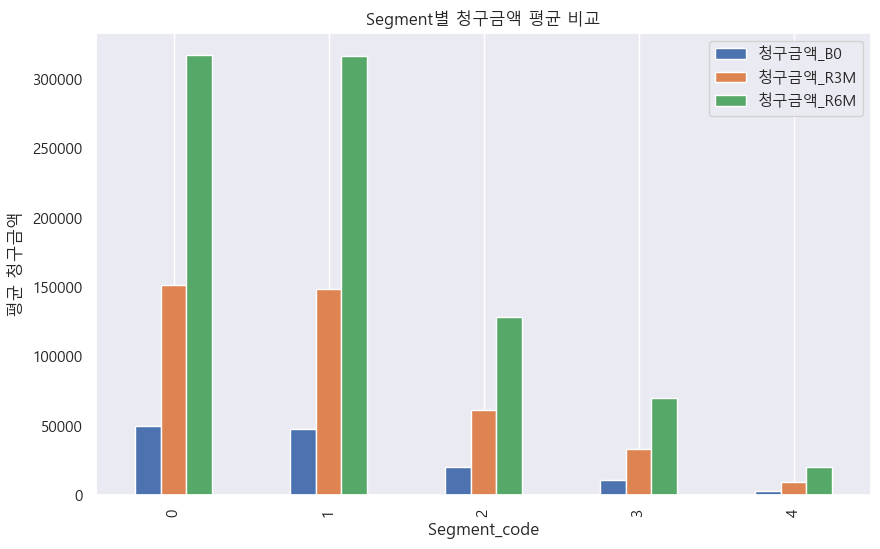

In [15]:
# 1) 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
columns_claim = ['청구금액_B0', '청구금액_R3M', '청구금액_R6M']
df_claim = pd.read_parquet('open/train/4.청구입금정보', columns=['ID'] + columns_claim)

# 2) Segment 인코딩
le = LabelEncoder()
df_member['Segment_code'] = le.fit_transform(df_member['Segment'])

# 3) 병합
df = pd.merge(df_member[['ID', 'Segment_code']], df_claim, on='ID')

# 4) Segment별 청구금액 평균 계산
segment_means = df.groupby('Segment_code')[columns_claim].mean()

print(segment_means)

# 5) 시각화
segment_means.plot(kind='bar', figsize=(10,6))
plt.title('Segment별 청구금액 평균 비교')
plt.xlabel('Segment_code')
plt.ylabel('평균 청구금액')
plt.grid(axis='y')
plt.show()
